In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
path_to_img='img_in/dan-smedley-j4OEr2IMBOs-unsplash.jpg'
prob = 9
struct = (1/43) * np.array([
    [1,7,1],
    [7,11,7],
    [1,7,1]
])

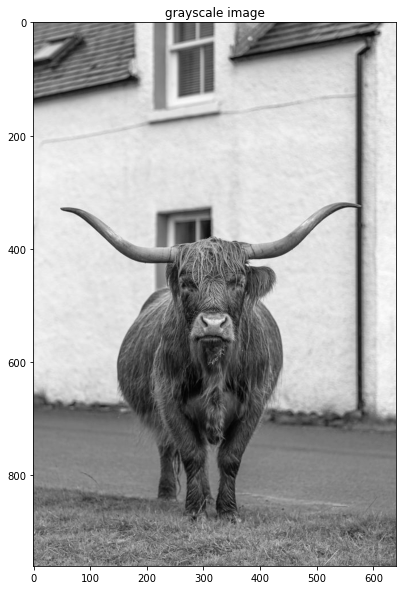

In [4]:
img = cv2.imread(path_to_img,0)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('grayscale image')
plt.show()

In [5]:
def sp(img: np.ndarray, part: float)->np.ndarray:
    random_index = (np.random.rand(img.shape[0], img.shape[1])*100).astype(np.uint8) # генерируем случаный индексы
    output = np.copy(img) # делаем глубокую копию изображения
    output[random_index<=part] = 255 # заменяем значение пиксела
    return output

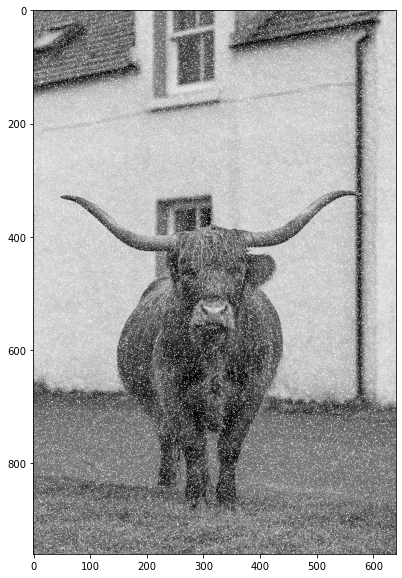

In [6]:
noisy_img = sp(img, prob)
plt.figure(figsize=(10,10))
plt.imshow(noisy_img, cmap=plt.cm.gray)

In [7]:
def fir_image(image, weighted_window):
  return cv2.merge(list(map(lambda channel: fir(channel, weighted_window), cv2.split(image))))

def fir(image, weighted_window):
  h, w = image.shape
  window_h, window_w = weighted_window.shape
  new_image = np.zeros((h, w), np.uint8)
  new_image = cv2.filter2D(image, -1, weighted_window)
  return new_image

In [8]:
def MSE(img: np.ndarray, img_processing: np.ndarray) -> float:
    return np.sum((img - img_processing)**2)/(img.shape[0]*img.shape[1]*3)

In [9]:
fir_result = fir_image(noisy_img, struct)

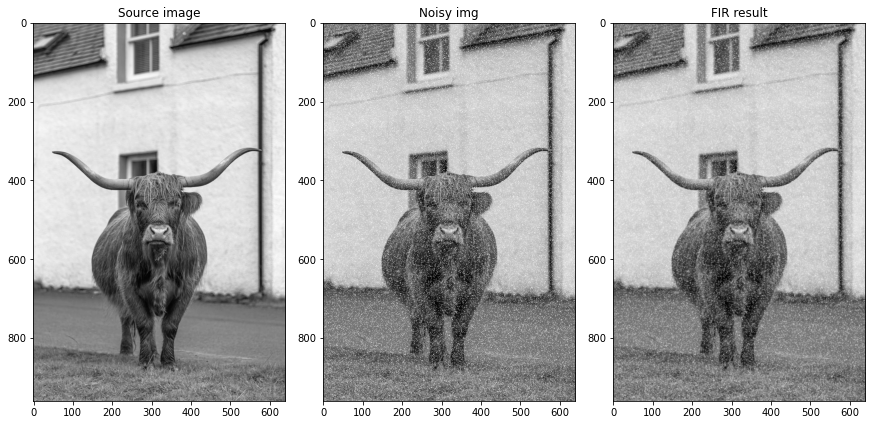

MSE for source image and noisy image: 3.7076600477430555
MSE for source image and filtered image: 17.6438330078125


In [10]:
fig, axs = plt.subplots(1,3,figsize=(12,12), constrained_layout=True)
axs[0].imshow(img, cmap=plt.cm.gray)
axs[0].set_title("Source image")
axs[1].imshow(noisy_img, cmap=plt.cm.gray)
axs[1].set_title("Noisy img")
axs[2].imshow(fir_result, cmap=plt.cm.gray)
axs[2].set_title("FIR result")
plt.show()
print(f'MSE for source image and noisy image: {MSE(img, noisy_img)}')
print(f'MSE for source image and filtered image: {MSE(img, fir_result)}')

In [11]:
def filtering_fft(image, kernel):
  
  s1 = np.array(image.shape)

  fsize = 2 ** np.ceil(np.log2(s1)).astype(int)
  fslice = tuple([slice(0, int(sz)) for sz in s1])

  image_fft = np.fft.fft2(image , fsize)

  kernel_fft = np.fft.fft2(kernel , fsize)
  result = np.fft.ifft2(image_fft * kernel_fft)[fslice].copy()

  return np.array(result.real , np.int32)

In [16]:
spectral =  filtering_fft(noisy_img, struct)

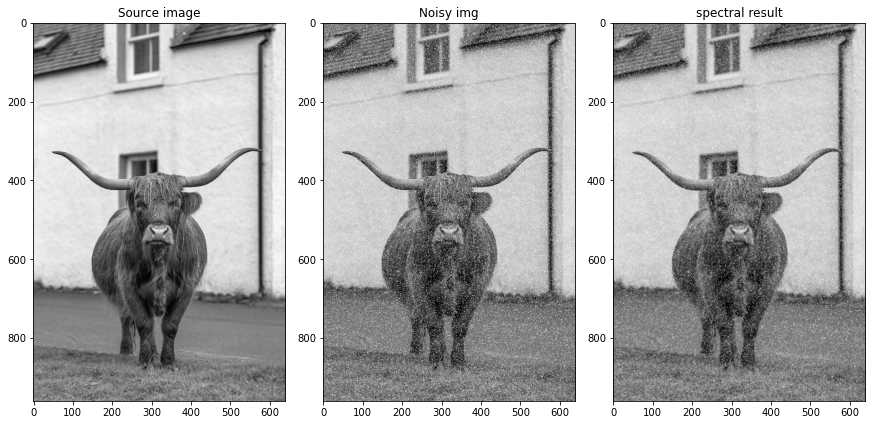

MSE for source image and noisy image: 3.7076600477430555
MSE for source image and filtered image: 173.77142523871527


In [17]:
fig, axs = plt.subplots(1,3,figsize=(12,12), constrained_layout=True)
axs[0].imshow(img, cmap=plt.cm.gray)
axs[0].set_title("Source image")
axs[1].imshow(noisy_img, cmap=plt.cm.gray)
axs[1].set_title("Noisy img")
axs[2].imshow(spectral, cmap=plt.cm.gray)
axs[2].set_title("spectral result")
plt.show()
print(f'MSE for source image and noisy image: {MSE(img, noisy_img)}')
print(f'MSE for source image and filtered image: {MSE(img, spectral)}')